<a href="https://colab.research.google.com/github/qiao-hao-git/ML_Code/blob/main/Planar_data_classfication_with_one_hidden_layer/Planar_data_classfication_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Planar data classification with one hidden layer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**将文件链接到Google云盘**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases_v2 import *
from planar_utils import plot_decision_boundary,sigmoid,load_extra_datasets

导入相关库和自定义模块

In [ ]:
np.random.seed(1)

设置一个随机种子保证结果一致性

In [ ]:
def load_planar_dataset():
  np.random.seed(1)
  m = 400
  N = int(m/2)
  D = 2
  X = np.zeros((m,D))
  Y = np.zeros((m,1),dtype="uint8")
  a = 4

  for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N)+np.random.randn(N)*0.2
    r = a*np.sin(4*t)+np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
    Y[ix] = j

  X = X.T
  Y = Y.T

  return X,Y

[[ 1.20444229e+00  1.58709904e-01  9.52471960e-02  3.49178475e-01
   6.94150378e-01  1.62065038e+00  1.53856225e+00  3.63085641e-02
   4.74591109e-01  1.65695828e-01  1.66446249e+00  8.40285720e-01
   2.61695163e-01  2.31614896e-01  1.58013020e+00  6.35509950e-03
   6.80610419e-01  1.21400432e-01  1.13281261e+00  1.61505892e+00
   1.66454441e-01  1.72438241e+00  1.88667246e+00  1.72327227e+00
   1.54661332e+00  9.84590400e-01  1.45313345e+00  7.49043388e-01
   1.45048341e+00  1.64287865e+00  1.28141487e+00  1.59574104e+00
   1.46298294e+00  1.46629048e+00  1.54348961e+00  1.57013416e+00
   1.22995404e+00  1.31142345e+00 -1.99364553e+00  3.94564752e-01
   1.51715449e+00  1.69169139e+00  1.74186686e+00 -2.91373382e+00
   7.52150898e-01  1.68537303e+00  3.71160238e-01 -3.73033884e+00
   3.52484080e-01 -1.48694206e+00 -7.45290416e-01  5.63807442e-01
   1.27093179e+00  5.35133607e-01 -1.71330375e-01 -2.50197293e+00
  -2.63275448e+00 -3.15561550e+00 -2.11022490e+00 -3.51303563e+00
  -3.52018

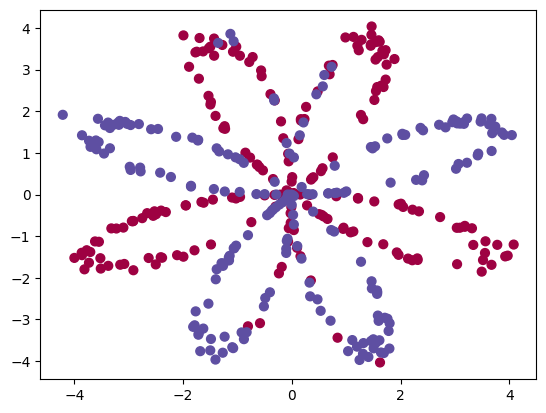

In [ ]:
X,Y = load_planar_dataset()
print(X)
print(Y)

plt.scatter(X[0,:],X[1,:],c=Y[0,:],s=40,cmap=plt.cm.Spectral)

生成一个二分类数据集

In [ ]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print('The shape of X is:'+str(shape_X))
print('The shape of Y is:'+str(shape_Y))
print('I have m = %d training examples!'%(m))

The shape of X is:(2, 400)
The shape of Y is:(1, 400)
I have m = 400 training examples!


In [ ]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T[:,0])

LogisticRegressionCV()

再使用神经网络之前，先使用线性逻辑回归来拟合一下看看效果

Accuracy of logistic regression: 47 %(precentage of correctly labelled datapoints)


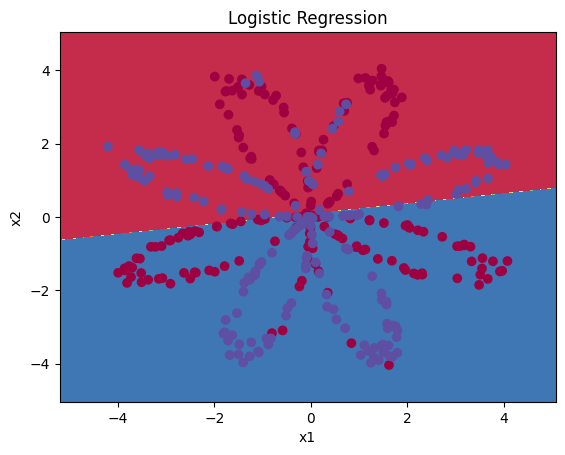

In [ ]:
plot_decision_boundary(lambda x:clf.predict(x),X,Y[0,:])
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d ' %float((np.dot(Y,LR_predictions)+np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) + '%' + '(precentage of correctly labelled datapoints)')

线性逻辑回归预测的准确率为47%

In [ ]:
def layer_sizes(X,Y):
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]

  return (n_x,n_h,n_y)

In [ ]:
X_assess,Y_assess = layer_sizes_test_case()
(n_x,n_h,n_y) = layer_sizes(X_assess,Y_assess)
print("X_assess: "+str(X_assess))
print("Y_assess: "+str(Y_assess))

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

X_assess: [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
Y_assess: [[-1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918]]
The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


求输入层，隐藏层，输出层的size

In [ ]:
def initialize_parameters(n_x,n_h,n_y):
  np.random.seed(2)

  W1 = np.random.randn(n_h,n_x)*0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h)*0.01
  b2 = np.zeros((n_y,1))

  assert(W1.shape==(n_h,n_x))
  assert(b1.shape==(n_h,1))
  assert(W2.shape==(n_y,n_h))
  assert(b2.shape==(n_y,1))

  parameters = {"W1":W1,"b1":b1,
          "W2":W2,"b2":b2}
  return parameters

In [ ]:
n_x,n_h,n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x,n_h,n_y)

print("w1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("w2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

w1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
w2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


初始化参数w1,b1,w2,b2,输入参数为输入层size:n_x,隐藏层size:n_h,输出层size:n_y,返回值为所求得的初始化参数parameters

In [ ]:
def forward_propagation(X,parameters):
  w1 = parameters["W1"]
  b1 = parameters["b1"]
  w2 = parameters["W2"]
  b2 = parameters["b2"]

  z1 = np.dot(w1,X)+b1
  a1 = np.tanh(z1)
  z2 = np.dot(w2,a1)+b2
  a2 = sigmoid(z2)

  assert(a2.shape==(1,X.shape[1]))

  cache = {"Z1":z1,"A1":a1,
      "Z2":z2,"A2":a2}
  return a2,cache

In [ ]:
X_assess,parameters = forward_propagation_test_case()
A2,cache = forward_propagation(X_assess,parameters)

print(np.mean(cache['Z1']),np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


前向传播部分，输入为训练数据X，初始化参数parameters，返回值为输出层a2，和一个包含了w1，b1，w2，b2的字典cache

In [ ]:
from numpy.ma.core import log
def compute_cost(A2,Y,parameters):
  m = Y.shape[1]
  logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
  costs = -(1.0/m)*np.sum(logprobs)

  costs = np.squeeze(costs)
  assert(isinstance(costs,float))

  return costs

In [ ]:
A2,Y_assess,parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2,Y_assess,parameters)))

cost = 0.6930587610394646


计算cost,输入为输出层A2,真实值Y和上述前向传播的参数parameters,返回值为损失cost

In [ ]:
def backward_propagation(parameters,cache,X,Y):
  m = X.shape[1]

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  A1 = cache["A1"]
  A2 = cache["A2"]

  dZ2 = A2-Y
  dW2 = np.dot(dZ2,A1.T)/m
  db2 = np.sum(dZ2,axis=1,keepdims=True)/m
  dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
  dW1 = np.dot(dZ1,X.T)/m
  db1 = np.sum(dZ1,axis=1,keepdims=True)/m

  grads = {"dW1":dW1,"db1":db1,
        "dW2":dW2,"db2":db2}

  return grads

In [ ]:
parameters,cache,X_access,Y_access = backward_propagation_test_case()

grads = backward_propagation(parameters,cache,X_assess,Y_access)
print("dW1 = "+str(grads["dW1"]))
print("db1 = "+str(grads["db1"]))
print("dW2 = "+str(grads["dW2"]))
print("db2 = "+str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


反向传播部分，输入为初始化参数parameters，隐藏层和输出层结果cache，训练数据集X_access和Y_access，返回值为反向传播的结果-梯度grads

In [ ]:
def update_parameters(parameters,grads,learning_rate=1.2):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2

  parameters = {"W1":W1,"b1":b1,
          "W2":W2,"b2":b2}

  return parameters

In [ ]:
parameters,grads = update_parameters_test_case()
parameters = update_parameters(parameters,grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


更新神经网络参数，输入为初始参数parameters，梯度grads，学习率learning_rate，返回值为更新后的parameters

In [ ]:
def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
  np.random.seed(3)
  n_x = layer_sizes(X,Y)[0]
  n_y = layer_sizes(X,Y)[2]

  parameters = initialize_parameters(n_x,n_h,n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  for i in range(0,num_iterations):
    A2,cache = forward_propagation(X,parameters)
    costs = compute_cost(A2,Y,parameters)
    grads = backward_propagation(parameters,cache,X,Y)
    parameters = update_parameters(parameters,grads)

    if print_cost and i % 1000 == 0:
      print("Cost after iteration %i:%f"%(i,costs))

  return parameters

In [ ]:
X_access,Y_access = nn_model_test_case()
parameters = nn_model(X_access,Y_access,4,num_iterations=10000,print_cost=True)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0:0.692739
Cost after iteration 1000:0.000218
Cost after iteration 2000:0.000107
Cost after iteration 3000:0.000071
Cost after iteration 4000:0.000053
Cost after iteration 5000:0.000042
Cost after iteration 6000:0.000035
Cost after iteration 7000:0.000030
Cost after iteration 8000:0.000026
Cost after iteration 9000:0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


神经网络模型，即上述前向传播与反向传播的迭代，输入参数为训练集X，Y，隐藏层size:n_h和迭代次数num_iterations，返回值为神经网络的参数parameters

In [ ]:
def predict(parameters,X):
  A2,cache = forward_propagation(X,parameters)
  predictions = (A2>0.5)

  return predictions

In [ ]:
parameters,X_access = predict_test_case()
predictions = predict(parameters,X_access)

print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


预测，输入值为神经网络参数parameters和测试集X_access，输出为预测正确率

Text(0.5, 1.0, 'Decison Boundary for hidden layer size4')

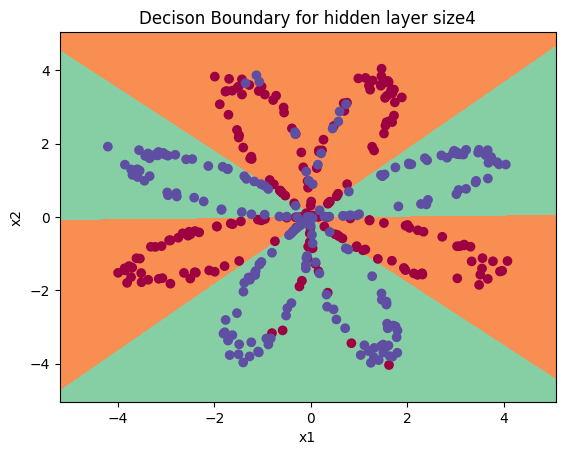

In [ ]:
parameters = nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=False)
plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y[0,:])
plt.title("Decison Boundary for hidden layer size"+str(4))

In [ ]:
predictions = predict(parameters,X)
print("Accuracy: %d"%float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)+"%")

Accuracy: 90%


计算上述实现的神经网络模型的预测正确率

Accuracy for 1 hidden units:67.5%
Accuracy for 2 hidden units:67.25%
Accuracy for 3 hidden units:90.75%
Accuracy for 4 hidden units:90.5%
Accuracy for 5 hidden units:91.25%
Accuracy for 20 hidden units:90.0%
Accuracy for 50 hidden units:90.25%


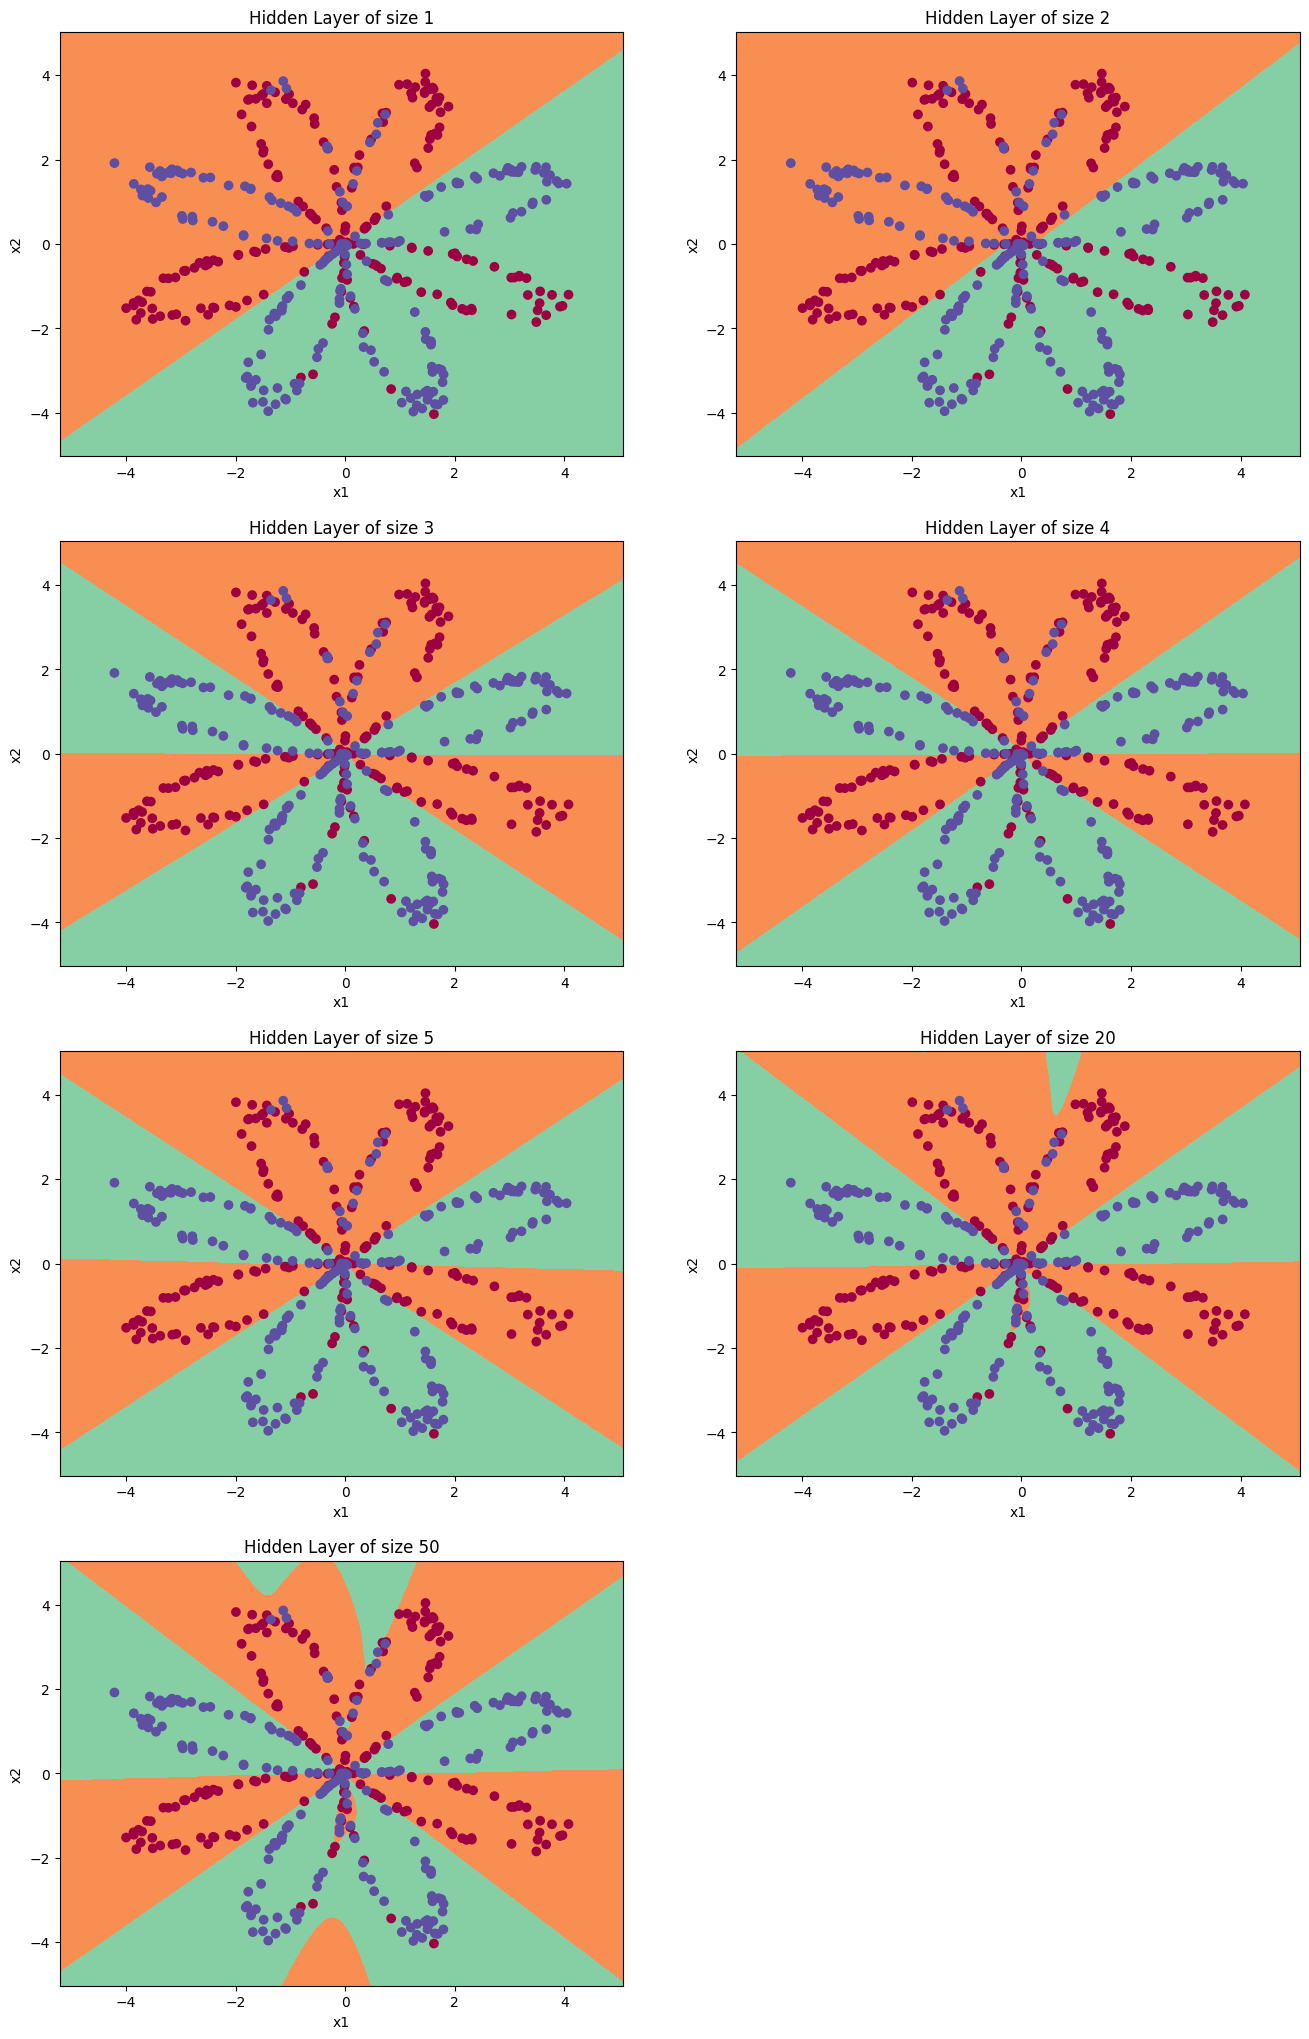

In [ ]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i,n_h in enumerate(hidden_layer_sizes):
  plt.subplot(5,2,i+1)
  plt.title('Hidden Layer of size %d'%n_h)
  parameters = nn_model(X,Y,n_h,num_iterations=5000)
  plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y[0,:])
  predictions = predict(parameters,X)
  accuracy = float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
  print("Accuracy for {} hidden units:{}%".format(n_h,accuracy))

改变隐藏层的size大小得到的不同预测结果

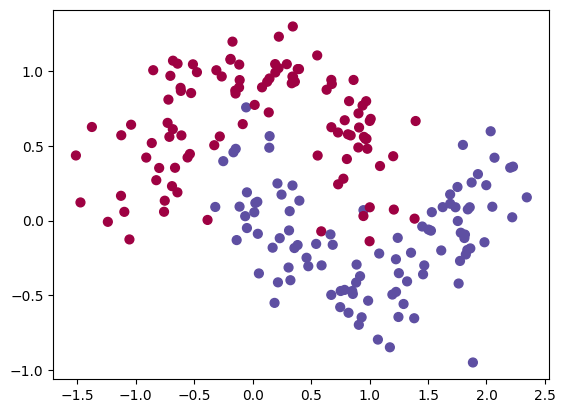

In [ ]:
noisy_circles,noisy_moons,blobs,gaussian_quantiles,no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
      "noisy_moons": noisy_moons,
      "blobs": blobs,
      "gaussian_quantiles": gaussian_quantiles}
dataset = "noisy_moons"

X,Y = datasets[dataset]
X,Y = X.T,Y.reshape(1,Y.shape[0])

if dataset == 'bolbs':
  Y = Y%2

plt.scatter(X[0,:],X[1,:],c=Y[0,:],s=40,cmap=plt.cm.Spectral)

在其他数据集上运行......